**Safe and readily available water** is important for public health, whether it is used for drinking, domestic use, food production or recreational purposes. Improved water supply and sanitation, and better management of water resources, can *boost* countries’ economic growth and can contribute greatly to poverty reduction.

Contaminated water and poor sanitation are linked to transmission of diseases such as **cholera, diarrhoea, dysentery, hepatitis A, typhoid, and polio**. Absent, inadequate, or inappropriately managed water and sanitation services expose individuals to preventable health risks. This is particularly the case in health care facilities where both patients and staff are placed at additional risk of infection and disease when water, sanitation, and hygiene services are lacking. Globally, **15%** of patients develop an infection during a hospital stay, with the proportion much greater in low-income countries.

So, I took some inspiration from this to use this **Water Quality** dataset to understand what consitutes to safe, Potable water and apply machine learning to it to distinguish between Potable and Non-Potable water.

<div style="background-color:#B4DBE9;">
    <center><img src="https://raw.githubusercontent.com/jaykumar1607/Water-Quality/main/water_sanitation.gif">
</div>

1. **ph**: pH of 1. water (0 to 14).

2. **Hardness**: Capacity of water to precipitate soap in mg/L.

3. **Solids**: Total dissolved solids in ppm.

4. **Chloramines**: Amount of Chloramines in ppm.

5. **Sulfate**: Amount of Sulfates dissolved in mg/L.

6. **Conductivity**: Electrical conductivity of water in μS/cm.

7. **Organic_carbon**: Amount of organic carbon in ppm.

8. **Trihalomethanes**: Amount of Trihalomethanes in μg/L.

9. **Turbidity**: Measure of light emiting property of water in NTU.

10. **Potability**: Indicates if water is safe for human consumption. Potable - 1 and Not potable - 0

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_651a44c6256d4289950e25263ac926ad = 'https://s3.us.cloud-object-storage.appdomain.cloud'
else:
    endpoint_651a44c6256d4289950e25263ac926ad = 'https://s3.private.us.cloud-object-storage.appdomain.cloud'

client_651a44c6256d4289950e25263ac926ad = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='QaG9CCaAbuUWvmoq8UTBa8Oh9b4PM-yFULVsGptC0J94',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_651a44c6256d4289950e25263ac926ad)

body = client_651a44c6256d4289950e25263ac926ad.get_object(Bucket='waterqualitydrinkingwaterpotabili-donotdelete-pr-y19ucaazm8kmih',Key='water_potability.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

raw_data = pd.read_csv(body)
raw_data.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [8]:
raw_data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [9]:
raw_data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [10]:
raw_data.shape

(3276, 10)

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


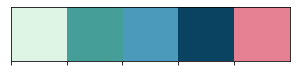

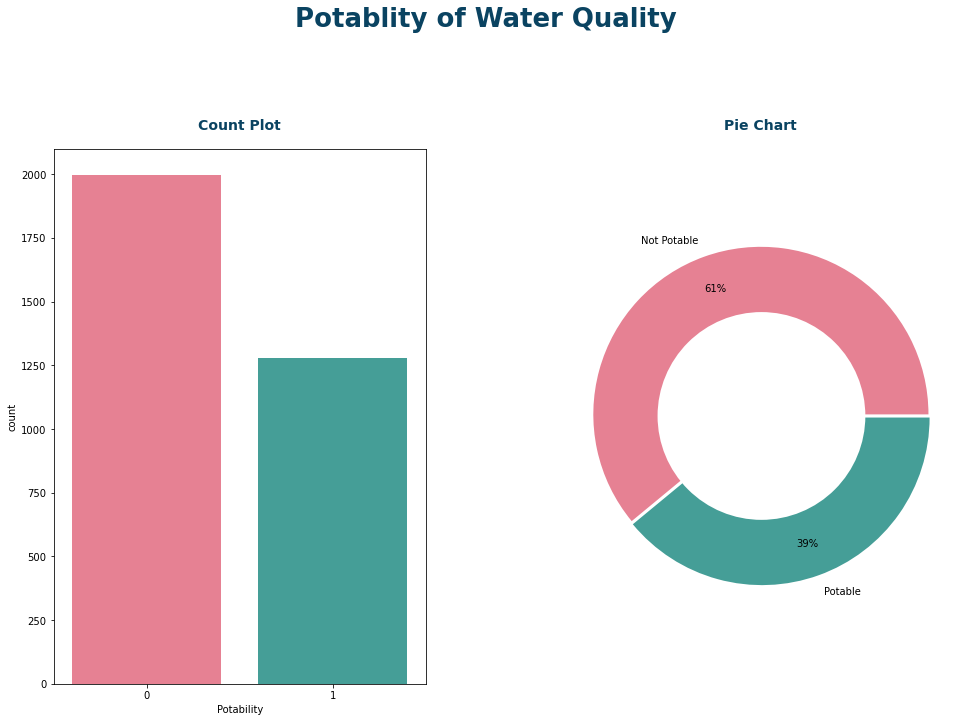

In [11]:
#theme
theme = ["#DEF5E5", "#459E97", "#4B9ABB","#0A4361","#E68193",]
sns.palplot(sns.color_palette(theme))
#plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 11))
fig.suptitle(' Potablity of Water Quality ', size = 26, color = theme[3], weight='bold')
axs = [ax1, ax2]

#Count-Plot
sns.countplot(raw_data['Potability'], ax=ax1, palette='husl')
ax1.set_title('Count Plot', size = 14, color = theme[3], weight='bold', pad=20)



#Data-2
names = ["Not Potable", "Potable"]
values = raw_data['Potability'].value_counts()
colors = ["#E68193","#459E97"]
explode = (0.01, 0.01)

#Doughnut-chart
ax2.pie(x= values,labels =names, colors=colors,autopct='%1.0f%%', pctdistance=0.8,explode=explode)

#draw-circle
centre_circle = plt.Circle((0,0),0.62,fc='white')
ax2.add_artist(centre_circle)
ax2.axis('equal')

ax2.set_title('Pie Chart', size = 14, color = theme[3], weight='bold', pad=20)

plt.subplots_adjust(left=None, bottom=None, right=None, top=0.8, wspace=0.4, hspace=None);

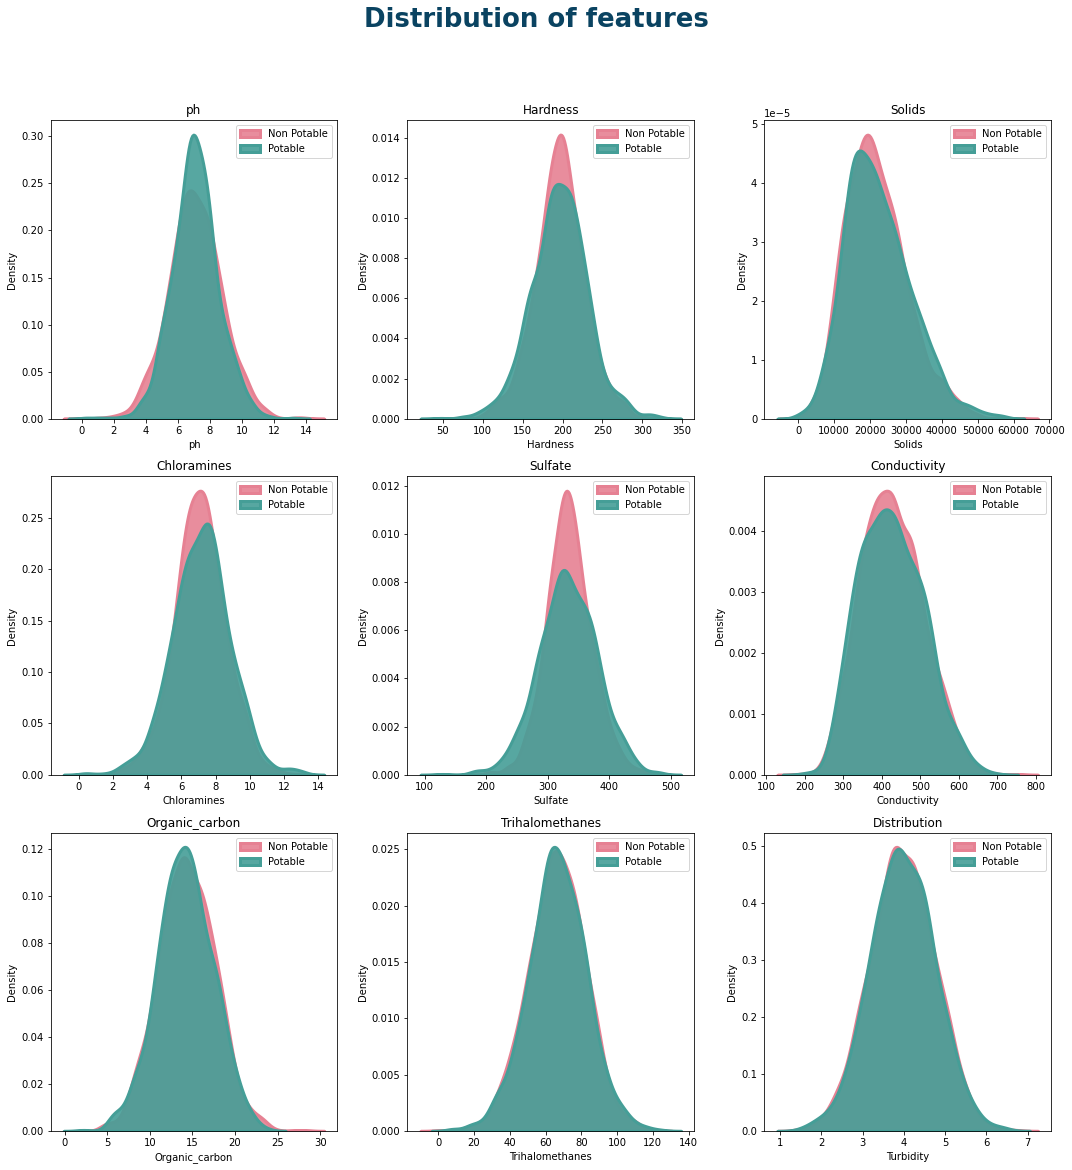

In [12]:
non_potable = raw_data.query("Potability == 0")
potable = raw_data.query("Potability == 1")

plt.figure(figsize = (15,15))
for ax, col in enumerate(raw_data.columns[:9]):
    plt.subplot(3,3, ax + 1)
    plt.title(col)
    plotting = sns.kdeplot(x = non_potable[col], label = "Non Potable",fill=True, common_norm=False, color="#E68193",alpha=.9, linewidth=3)
    plotting = sns.kdeplot(x = potable[col], label = "Potable",fill=True, common_norm=False, color="#459E97",alpha=.9, linewidth=3)
    plt.legend()
plt.tight_layout()
plt.title('Distribution')
plotting.figure.suptitle(' Distribution of features ',y=1.08, size = 26, color = theme[3], weight='bold');

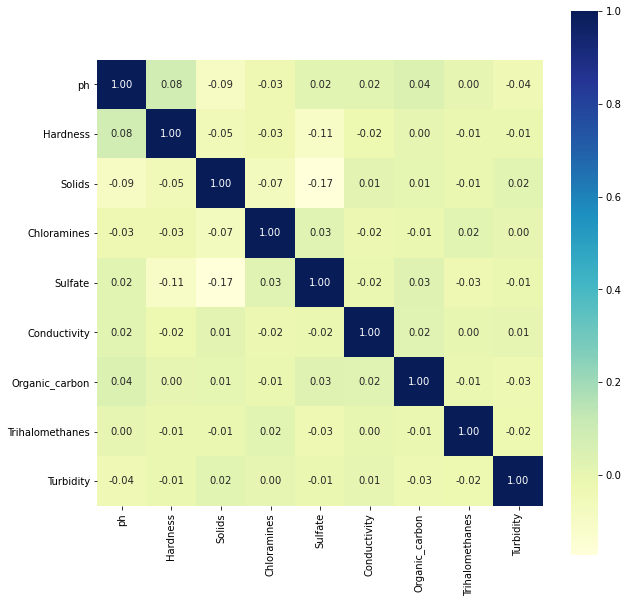

In [13]:
Corrmat = raw_data.drop('Potability', axis = 1).corr()
plt.subplots(figsize=(10,10))
sns.heatmap(Corrmat, cmap="YlGnBu", square = True, annot=True, fmt='.2f')
plt.show()

Boxplot of different features by Potability



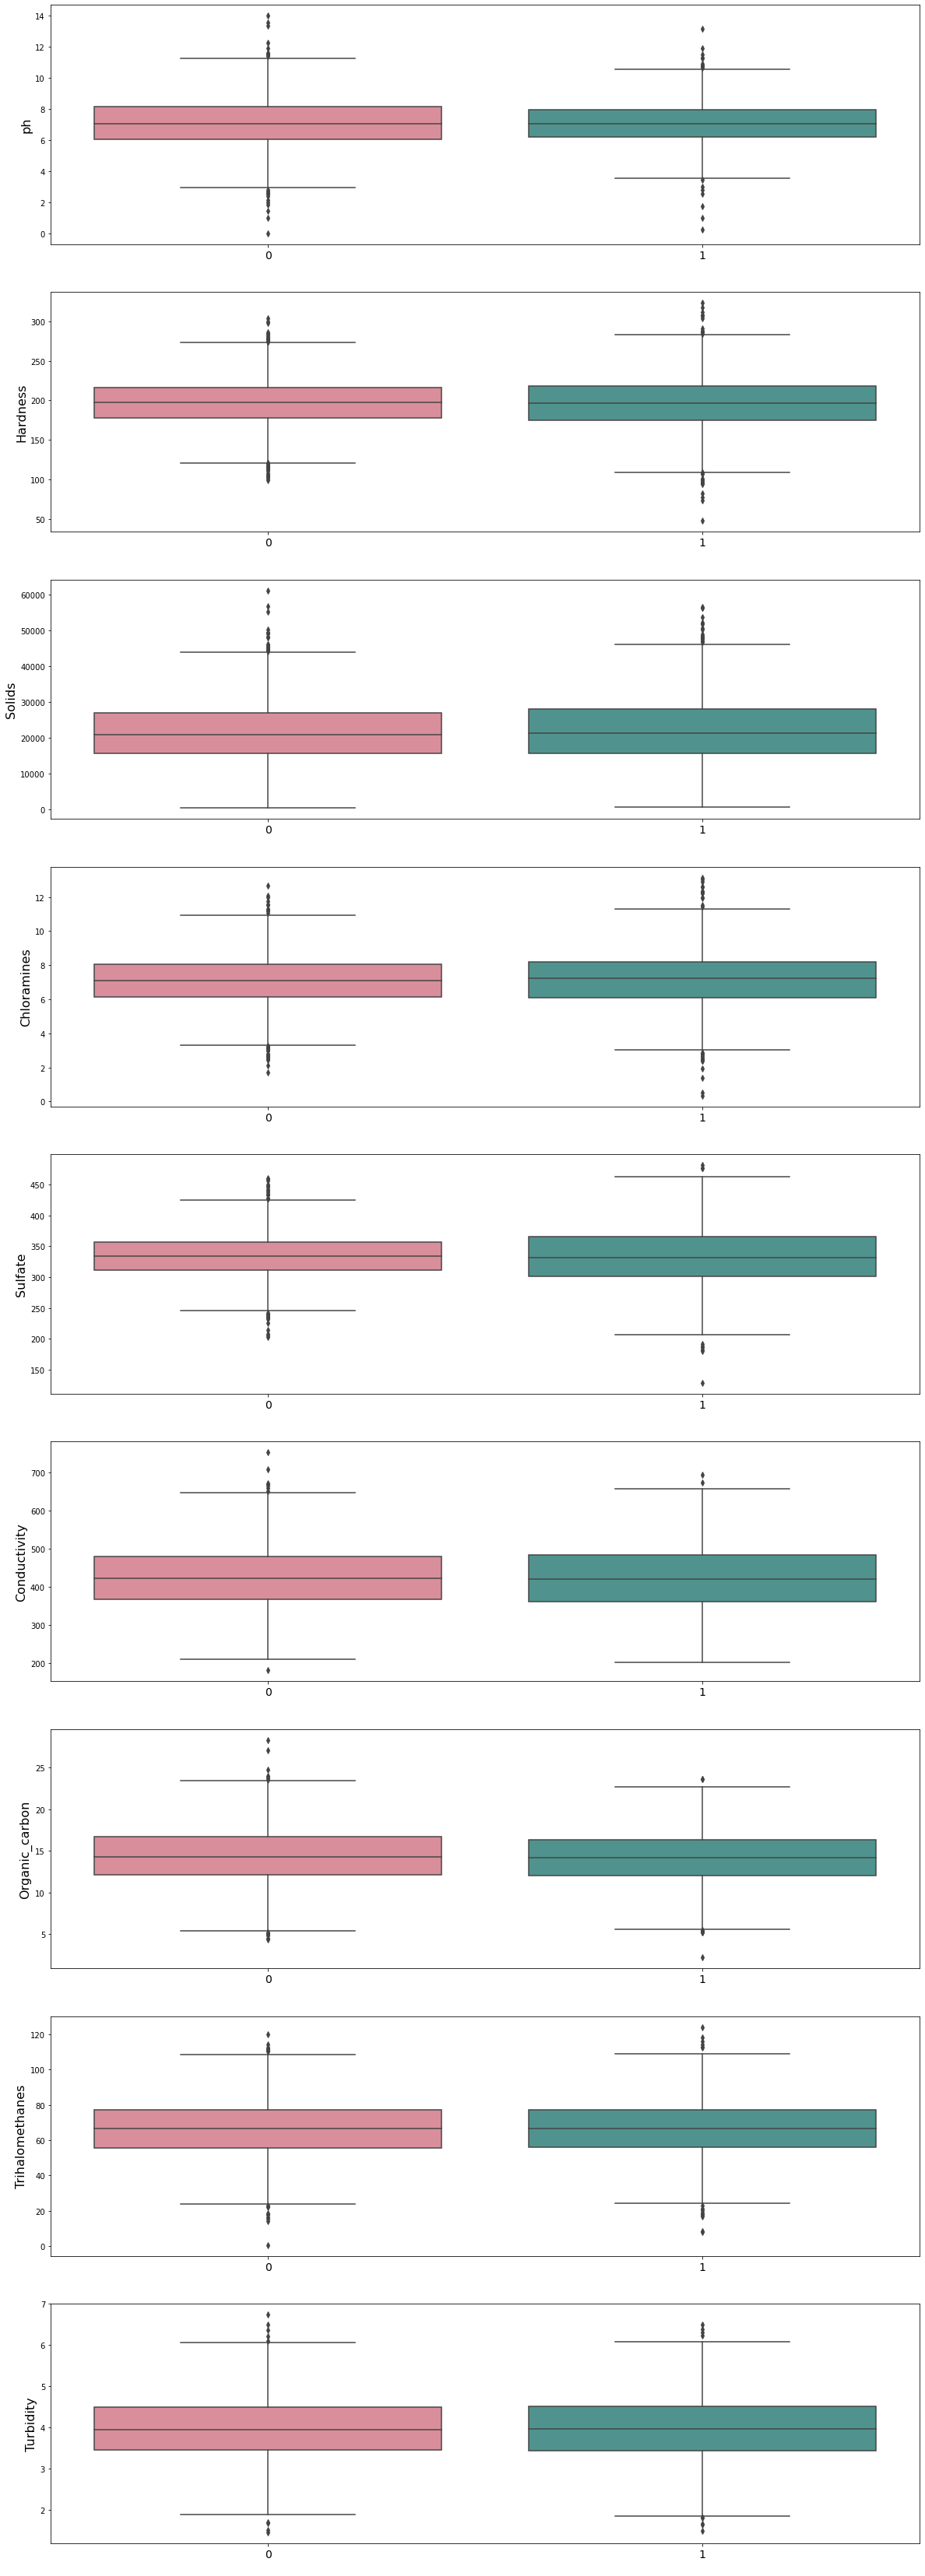

In [14]:
print('Boxplot of different features by Potability\n')

fig, ax = plt.subplots(ncols = 1, nrows=9, figsize=(20, 60))

features = list(raw_data.columns.drop('Potability'))
i=0
for cols in features:
    
    sns.boxplot(data= raw_data, y=cols, x='Potability', ax=ax[i], palette=('#E68193', '#459E97'))
    ax[i].set_xlabel(' ')
    ax[i].set_ylabel(' ')
    ax[i].xaxis.set_tick_params(labelsize=14)
    ax[i].set_ylabel(cols, fontsize=16)
    i=i+1
      
plt.show()

<AxesSubplot:title={'center':'Missing Values Per Feature'}>

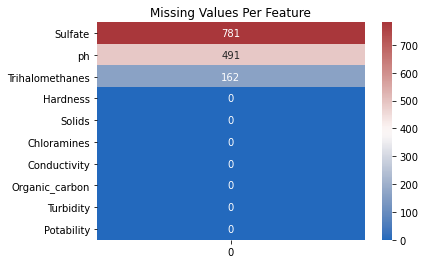

In [15]:
plt.title('Missing Values Per Feature')
nans = raw_data.isna().sum().sort_values(ascending=False).to_frame()
sns.heatmap(nans,annot=True,fmt='d',cmap='vlag')